In [68]:
import gower
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors as knn

In [65]:
benchmark = pd.read_csv('Data/benchmark.csv', sep =";", decimal=",")
benchmark = benchmark.iloc[:, :-2]
labels = benchmark.iloc[:, -1]
benchmark = benchmark.iloc[:, :-1]
scaler = MinMaxScaler()
benchmark.iloc[:, -5:] = scaler.fit_transform(benchmark.iloc[:, -5:])
# cast the columns from 1 to 15 to int
benchmark.iloc[:, 1:16] = benchmark.iloc[:, 1:16].astype(float)
benchmark.iloc[:, 1:16] = benchmark.iloc[:, 1:16].astype(int)

In [66]:
benchmark

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.123482,0.063153,0.058222,0.373256,0.040495
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.058704,0.15789,0.154425,0.411891,0.099685
2,0.16,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0.058704,0.199996,0.14683,0.44194,0.087224
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.230769,0.031574,0.060754,0.261644,0.060744
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.09919,0.031574,0.012652,0.497746,0.006227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000001,0.084206,0.38987,0.321743,0.317754
6912,0.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.000212,0.316451,0.459111,0.18224
6913,0.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000003,0.263154,0.316451,0.489161,0.169779
6914,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000002,0.000212,0.26835,0.377549,0.18847


In [57]:
path = "Data/dataset.csv"
# Load dataset
dataset = pd.read_csv(path, sep=";", decimal=",")
dataset = dataset.iloc[:, 1:-2]
dataset

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875
7196,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250
7198,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688


In [ ]:
dist_matrix = gower.gower_matrix(benchmark)

In [135]:
db = DBSCAN(eps=0.2380, min_samples=10, metric="precomputed").fit(dist_matrix)
labels = db.labels_
print("[DBSCAN] Founded", len(np.where(labels == -1)[0]), "outliers")

[DBSCAN] Founded 123 outliers


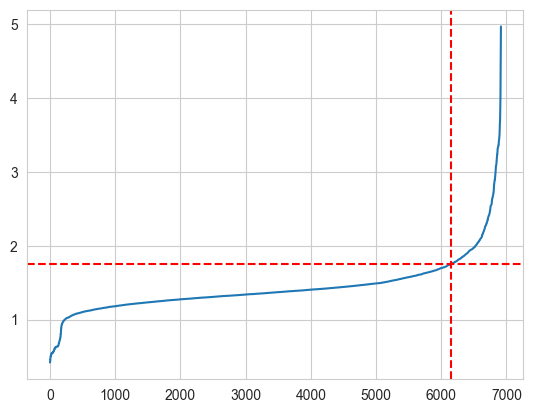

In [72]:
neighborhood_set = knn(n_neighbors=10).fit(dist_matrix)
distances, indices = neighborhood_set.kneighbors(dist_matrix)

i = np.arange(len(distances))
knee = KneeLocator(i, np.sort(distances[:, -1]), S=1, curve='convex', direction='increasing',
                   interp_method='polynomial')
plt.plot(np.sort(distances[:, -1]))
plt.axvline(knee.knee, color='red', linestyle='--')
plt.axhline(knee.knee_y, color='red', linestyle='--')
plt.show()

In [73]:
knee.knee_yddd

1.7489873170852661